In [3]:
import folium 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import sys
sys.path.append('../scripts/')

from data_extraction import DataExtraction
dextract = DataExtraction()


In [5]:
df = dextract.load_data('../data/features.csv')
df.head()

,id,order_id,driver_id,driver_action,lat,lng,order_origin,trip_origin,trip_destination,trip_Start_time,trip_end_time,driver_order_dst,trip_dstance,trip_time,trip_speed,month,day,week_day,hour
0,1,392001,243828,accepted,6.602207,3.270465,"(6.6022066, 3.2704649)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,693.62,21048.29,217.0,96.996728,7.0,1.0,3.0,9.0
1,2,392001,243588,rejected,6.592097,3.287445,"(6.5920972, 3.2874447)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,1554.09,21048.29,217.0,96.996728,7.0,1.0,3.0,9.0
2,3,392001,243830,rejected,6.596133,3.281784,"(6.5961334, 3.2817841)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,788.35,21048.29,217.0,96.996728,7.0,1.0,3.0,9.0
3,4,392001,243539,rejected,6.596142,3.280526,"(6.5961416, 3.2805263)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,694.07,21048.29,217.0,96.996728,7.0,1.0,3.0,9.0
4,5,392001,171653,rejected,6.609232,3.288800,"(6.6092317, 3.2887999)","(6.6010417, 3.2766339)","(6.4501069, 3.3916154)",2021-07-01 09:30:59,2021-07-01 09:34:36,1623.33,21048.29,217.0,96.996728,7.0,1.0,3.0,9.0


### plot latitude vs longitude of dirver location 

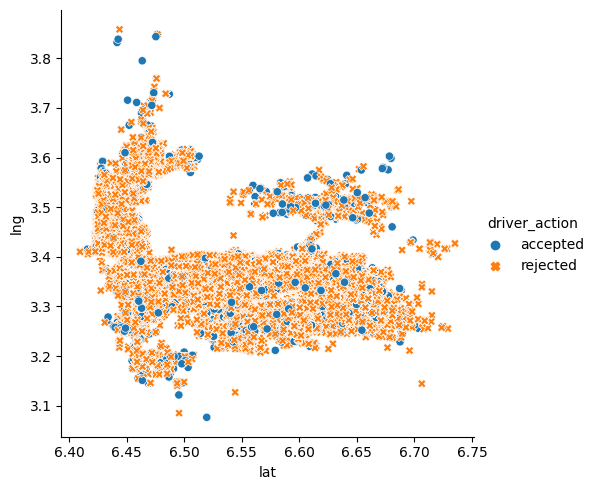

In [6]:
sns.relplot(
    data=df,
    x="lat", y="lng", hue="driver_action", style="driver_action"
)

### plot driver distance vs acceptance rate

In [7]:
df_acc = df.groupby(['order_id','driver_action']).agg(
    {'driver_order_dst':'mean'}).reset_index()
# df_acc['dod'] = df_acc['driver_order_dst']['mean']
df_acc

,order_id,driver_action,driver_order_dst
0,392001,accepted,693.620000
1,392001,rejected,1301.110000
2,392005,accepted,1968.050000
3,392005,rejected,1766.937000
4,392009,accepted,2954.030000
...,...,...,...
51242,497721,rejected,3124.010000
51243,510268,accepted,1847.630000
51244,510268,rejected,2273.346667
51245,517948,accepted,2310.200000


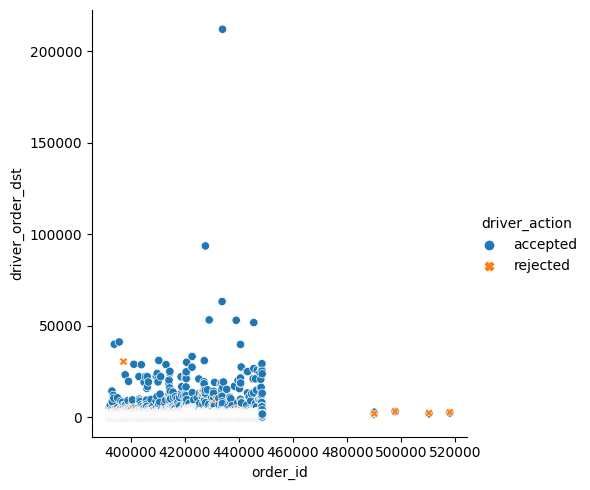

In [8]:
sns.relplot(
    data=df_acc[df_acc['driver_order_dst']<500000],
    x="order_id", y="driver_order_dst", hue="driver_action", style="driver_action"
)

This graph depict that the driver rejecting a request are closer than the accepting drivers.

In [9]:
accepted_df = df[df['driver_action']=='accepted']
rejected_df = df[df['driver_action']=='rejected']

print('accepted shape {}'.format(accepted_df.shape))
print('rejected shape {}'.format(rejected_df.shape))

accepted shape (25902, 19)
rejected shape (1531837, 19)


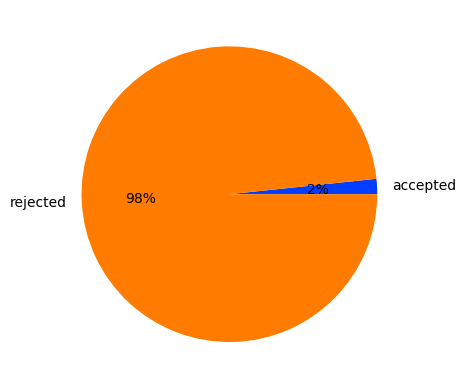

In [10]:
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# plotting data on chart
plt.pie([25902,1531837], labels=['accepted','rejected'], colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()

2% of the driver accepted the request. Most of the driver are rejecting. Why?

### month 
- which month has the highest request
- which month has the highest accept/reject

In [11]:
df_acc = df.groupby(['driver_action','month']).agg(
    {'driver_action':['count']}).reset_index()
df_acc

,driver_action,month,driver_action
,,,count
0,accepted,1.0,1
1,accepted,2.0,2
2,accepted,7.0,25865
3,accepted,9.0,2
4,rejected,1.0,3
5,rejected,2.0,74
6,rejected,7.0,1529489
7,rejected,8.0,217
8,rejected,9.0,64


In [12]:
df_acc_new = pd.DataFrame()
df_acc_new['count'] = df_acc['driver_action']['count'] 
df_acc_new['driver_action'] = df_acc['driver_action']['']  
df_acc_new['month'] = df_acc['month']

<AxesSubplot: xlabel='month', ylabel='count'>

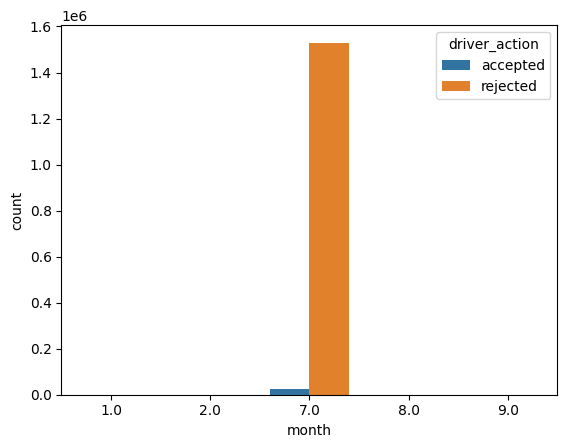

In [13]:
sns.barplot(
    data=df_acc_new,
    x="month", y="count", hue="driver_action"
)

## Week day

In [14]:
df_acc = df.groupby(['driver_action','week_day']).agg(
    {'driver_action':['count']}).reset_index()
df_acc

,driver_action,week_day,driver_action
,,,count
0,accepted,0.0,2750
1,accepted,1.0,3013
2,accepted,2.0,3204
3,accepted,3.0,6443
4,accepted,4.0,6724
5,accepted,5.0,2524
6,accepted,6.0,1212
7,rejected,0.0,157984
8,rejected,1.0,357254


In [15]:

df_acc_new = pd.DataFrame()
df_acc_new['count'] = df_acc['driver_action']['count'] 
df_acc_new['week_day'] = df_acc['week_day'] 
df_acc_new['driver_action'] = df_acc['driver_action'][''] 

<AxesSubplot: xlabel='week_day', ylabel='count'>

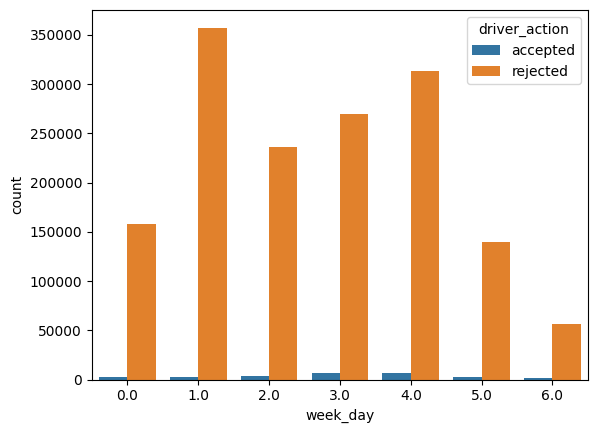

In [16]:
sns.barplot(
    data=df_acc_new,
    x="week_day", y="count", hue="driver_action"
)

In [17]:
df_acc = df.groupby(['driver_action','day']).agg(
    {'driver_action':['count']}).reset_index()
df_acc

,driver_action,day,driver_action
,,,count
0,accepted,1.0,3233
1,accepted,2.0,3416
2,accepted,3.0,2523
3,accepted,4.0,1213
4,accepted,5.0,2750
5,accepted,6.0,3013
6,accepted,7.0,3204
7,accepted,8.0,3210
8,accepted,9.0,3305


In [21]:

df_acc_new = pd.DataFrame()
df_acc_new['count'] = df_acc['driver_action']['count'] 
df_acc_new['day'] = df_acc['day'].astype('int')
df_acc_new['driver_action'] = df_acc['driver_action'][''] 

<AxesSubplot: xlabel='day', ylabel='count'>

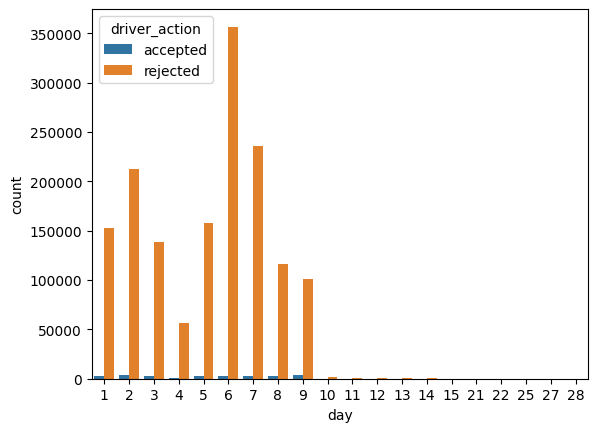

In [22]:
sns.barplot(
    data=df_acc_new,
    x="day", y="count", hue="driver_action"
)

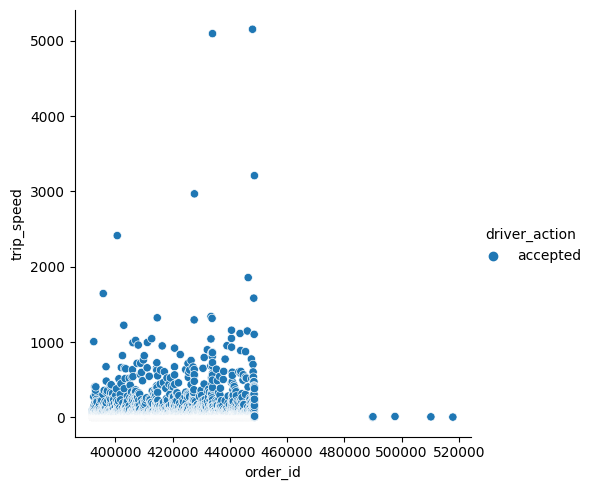

In [23]:
sns.relplot(
    data=accepted_df,
    x="order_id", y="trip_speed", hue="driver_action", style="driver_action"
)

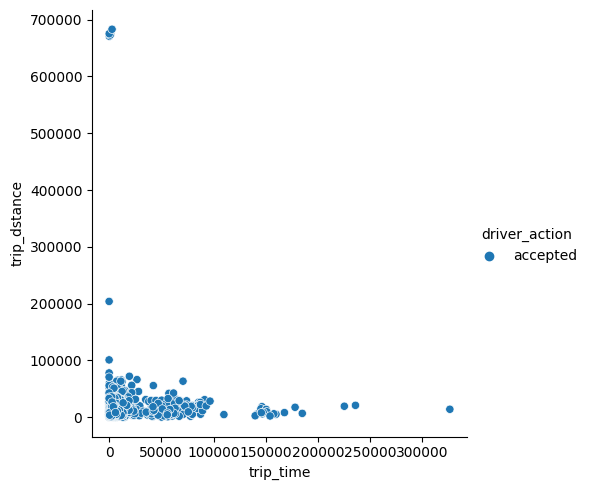

In [24]:
sns.relplot(
    data=accepted_df,
    x="trip_time", y="trip_dstance", hue="driver_action", style="driver_action"
)

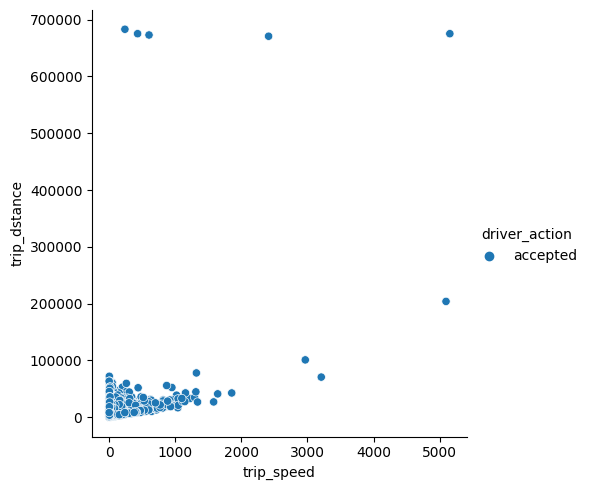

In [25]:
sns.relplot(
    data=accepted_df,
    x="trip_speed", y="trip_dstance", hue="driver_action", style="driver_action"
)

In [27]:
handed_over = accepted_df[accepted_df['trip_speed'] < 10]
print('Handed over deliveries count {}'.format(handed_over.shape)) 

Handed over deliveries count (22816, 19)


In [28]:
df_acc = df.groupby(['driver_action','hour']).agg(
    {'driver_action':['count']}).reset_index()
df_acc

,driver_action,hour,driver_action
,,,count
0,accepted,0.0,2
1,accepted,2.0,1
2,accepted,6.0,51
3,accepted,7.0,360
4,accepted,8.0,1053
5,accepted,9.0,1808
6,accepted,10.0,2363
7,accepted,11.0,2681
8,accepted,12.0,2789


In [31]:
df_acc_new = pd.DataFrame()
df_acc_new['count'] = df_acc['driver_action']['count'] 
df_acc_new['hour'] = df_acc['hour'].astype('int')
df_acc_new['driver_action'] = df_acc['driver_action'][''] 


<AxesSubplot: xlabel='hour', ylabel='count'>

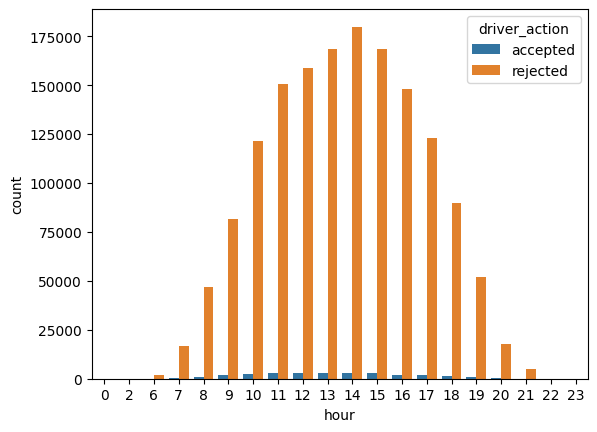

In [35]:
sns.barplot(
    data=df_acc_new,
    x="hour", y="count",hue='driver_action'
)

In [32]:
df_acc_new_acc = df_acc_new[df_acc_new['driver_action']=='accepted']
df_acc_new_rej = df_acc_new[df_acc_new['driver_action']=='rejected']

<AxesSubplot: xlabel='hour', ylabel='count'>

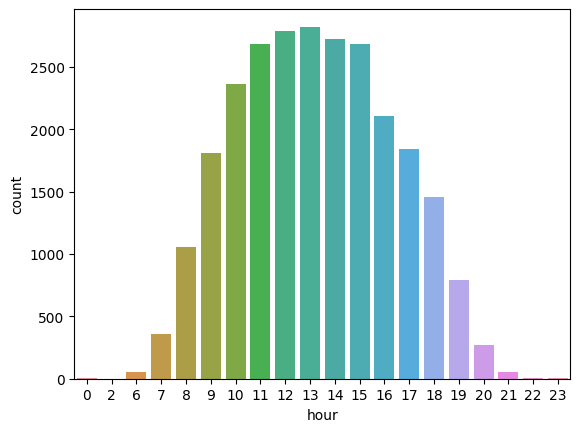

In [33]:
sns.barplot(
    data=df_acc_new_acc,
    x="hour", y="count"
)

<AxesSubplot: xlabel='hour', ylabel='count'>

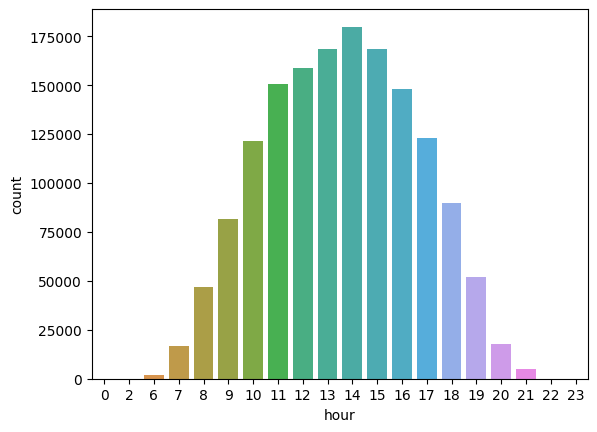

In [39]:
sns.barplot(
    data=df_acc_new_rej,
    x="hour", y="count"
)